<a href="https://colab.research.google.com/github/natalia7244/Machine-Learning-Exercises/blob/main/NLP_Excercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentimenial Analysis - Excercise

In [5]:
!python -m textblob.download_corpora


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [6]:
from textblob import TextBlob

# List of test sentences
sentences = [
    "The movie was absolutely wonderful.",
    "I had a terrible day at work.",
    "This book is okay, but not exciting.",
    "She is a brilliant teacher.",
    "The food was cold and tasteless."
]

# Process each sentence
for text in sentences:
    blob = TextBlob(text) #converts the sentence into a TextBlob to understand words, feelings, grammar
    adjectives = [word for word, tag in blob.tags if tag.startswith('JJ')]  # JJ = adjective
    polarity = blob.sentiment.polarity  # -1 (negative) to +1 (positive)

    print(f"Sentence: {text}")
    print(f"Adjectives: {adjectives}")

    if polarity > 0:
        print("Sentiment: Positive\n")
    elif polarity < 0:
        print("Sentiment: Negative\n")
    else:
        print("Sentiment: Neutral\n")


Sentence: The movie was absolutely wonderful.
Adjectives: ['wonderful']
Sentiment: Positive

Sentence: I had a terrible day at work.
Adjectives: ['terrible']
Sentiment: Negative

Sentence: This book is okay, but not exciting.
Adjectives: ['okay', 'exciting']
Sentiment: Positive

Sentence: She is a brilliant teacher.
Adjectives: ['brilliant']
Sentiment: Positive

Sentence: The food was cold and tasteless.
Adjectives: ['cold']
Sentiment: Negative



# Is that news true or fake?

In [1]:
import pandas as pd

true_posts = pd.read_csv('/content/drive/MyDrive/Data_sets/Fake_news/True.csv', usecols =['title', 'text'])
fake_posts = pd.read_csv('/content/drive/MyDrive/Data_sets/Fake_news/Fake.csv', usecols = ['title', 'text'])

## New column - 'decision'

In [2]:
true_posts['decision'] = 1
fake_posts['decision'] = 0

print('Wielkość danych:', 'TN:', true_posts.shape, 'FN:', fake_posts.shape)

Wielkość danych: TN: (21417, 3) FN: (23481, 3)


## Join Datasest - combine rows

In [3]:
df = pd.concat([true_posts, fake_posts])

print('Wielkość danych:', df.shape)

Wielkość danych: (44898, 3)


In [4]:
print(df)

                                                   title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text  decision  
0      WASHINGTON (Reuters) - The head of a conservat...         1  
1      WASHINGTON (Reuters) - Transgender people will...         1  
2      WASHINGTON (Reuters) - The special counsel inv...         1  
3  

## Mix rows - random order

In [7]:
df = df.sample(frac=1)
print(df)

                                                   title  \
5340   Trump supports free press but will call out fa...   
18070  AIRPORT PASSENGER “PAT DOWNS” Get More Intrusi...   
4380    BUSTED: Donald Trump Screwed Over American St...   
10695  Cruz seeks dismissal of case challenging U.S. ...   
6014    WATCH: GOP Leader Won’t Call Trump’s Attack O...   
...                                                  ...   
9443   Trump rallies gun owners with fiery anti-Clint...   
8709   Cleveland police say no shots fired on vehicle...   
9500   BUSTED! WATCH MEDIA’S FAKE VIDEO Trying To Mak...   
291     Trump Is Too Incompetent To Handle Disaster O...   
20234  Israeli leader in Argentina, lauds effort to s...   

                                                    text  decision  
5340   BRUSSELS (Reuters) - U.S. President Donald Tru...         1  
18070  One woman s awful experience at the airport co...         0  
4380   Donald Trump claims he will  make America grea...         0  
106

In [12]:
df.columns

Index(['title', 'text', 'decision'], dtype='object')

## Cleaning data using NLP rules

### Stop Words

In [8]:
from spacy.lang.en.stop_words import STOP_WORDS

stopwords = list(STOP_WORDS)


print(f"Stop wordz jest w liście {len(stopwords)}, a wyglądają następująco: \n\n", stopwords)

Stop wordz jest w liście 326, a wyglądają następująco: 

 ['somehow', 'onto', 'top', 'you', 'off', 'herself', 'my', 'would', 'ca', 'next', 'same', 'sixty', 'there', "n't", 'hereafter', 'i', 'be', 'why', 'anywhere', 'whereafter', 'thereupon', 'these', 'really', 'for', 'on', 'put', 'neither', 'beyond', 'using', 'serious', 'hereby', 'now', 'am', 'noone', 'together', 'therefore', 'itself', 'whenever', 'whereby', 'nobody', 'fifteen', 'they', 'those', '‘re', 'can', 'from', 'than', 'whereas', 'herein', 'either', 'everywhere', 'among', 'its', 'was', 'any', 'hence', 'something', 'everything', "'d", 'moreover', 'used', "'ve", 'n‘t', 'this', 'and', 'latter', 'whoever', '‘s', 're', 'show', 'within', 'least', 'becomes', 'yours', 'afterwards', 'back', '‘m', 'thereby', 'done', 'no', 'through', 'formerly', 'is', 'did', 'most', 'ours', "'re", 'therein', 'two', 'twenty', 'with', 'side', 'how', 'one', 'that', 'your', 'at', 'rather', 'whole', 'becoming', 'or', '’d', 'behind', 'full', 'please', 'because', 

### Punctation

In [9]:
import re
from string import punctuation


print("Interpunkcja:", punctuation)

Interpunkcja: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


### Clean_text function

In [10]:
def clean_text(text):
    temp = text.lower()  # 1. Make all letters lowercase
    temp = re.sub('\d', '', temp)  # 2. Remove all numbers
    temp = re.sub('<[^>]*>', '', temp)  # 3. Remove HTML tags like <p> or <div>
    emojis = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', temp)  # 4. Find emojis like :) or :-D
    temp = re.sub('[\W]+', ' ', temp) + ' '.join(emojis).replace('-', '')  # 5. Remove symbols (keep emojis)
    temp = re.sub('[{}]'.format(punctuation), '', temp)  # 6. Remove all punctuation
    temp = temp.strip()  # 7. Remove extra spaces at the beginning and end
    return temp  # 8. Return the cleaned text

from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

def text_tokenizer(text):
  text = clean_text(text) # wywołanie wcześniej przygotowanej funkcji do oczyszczenia
  words_after_stem = [porter.stem(word) for word in text.split()] # split dzieli na pojedyncze słowa, a potem ten stemmer je przetwarza
  return  [word for word in words_after_stem if word not in stopwords and len(word) > 2]



## Data Transformation

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

y = df['decision']
X = df['title'] + ' ' + ['text']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

vectorizer = CountVectorizer()

X_train_transform = vectorizer.fit_transform(X_train)
X_test_transform = vectorizer.transform(X_test)

print("Train shape:", X_train_transform.shape)
print("Test shape:", X_test_transform.shape)



Train shape: (31428, 18770)
Test shape: (13470, 18770)


In [29]:
print(X_train_transform)
print(X_test_transform)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 413906 stored elements and shape (31428, 18770)>
  Coords	Values
  (0, 18203)	1
  (0, 5767)	1
  (0, 18178)	1
  (0, 7317)	1
  (0, 12470)	1
  (0, 981)	1
  (0, 4863)	1
  (0, 7474)	1
  (0, 16051)	1
  (0, 18373)	1
  (0, 18516)	1
  (0, 1047)	1
  (0, 8082)	1
  (0, 13251)	1
  (0, 17949)	1
  (0, 16766)	1
  (1, 16766)	1
  (1, 12626)	1
  (1, 5416)	1
  (1, 934)	1
  (1, 4547)	1
  (1, 7308)	1
  (1, 11704)	1
  (1, 2278)	1
  (1, 996)	1
  :	:
  (31426, 8632)	1
  (31426, 9306)	1
  (31426, 11526)	1
  (31426, 707)	1
  (31426, 12705)	1
  (31426, 18231)	1
  (31426, 11297)	1
  (31426, 15531)	1
  (31426, 1900)	1
  (31426, 14776)	1
  (31427, 17949)	1
  (31427, 16766)	1
  (31427, 9306)	1
  (31427, 18482)	1
  (31427, 17486)	1
  (31427, 5575)	1
  (31427, 6342)	1
  (31427, 796)	1
  (31427, 7486)	1
  (31427, 8008)	1
  (31427, 3743)	1
  (31427, 14141)	1
  (31427, 12303)	1
  (31427, 7013)	1
  (31427, 6176)	1
<Compressed Sparse Row sparse matrix of dtype 'int

## Data exploration and obtained results

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

classifier = DecisionTreeClassifier(max_depth = 5)
classifier.fit(X_train_transform, y_train)

y_pred = classifier.predict(X_test_transform)

print("Results of classification on the test set:")
print(classification_report(y_test, y_pred))

Results of classification on the test set:
              precision    recall  f1-score   support

           0       0.94      0.63      0.75      7084
           1       0.70      0.95      0.81      6386

    accuracy                           0.78     13470
   macro avg       0.82      0.79      0.78     13470
weighted avg       0.82      0.78      0.78     13470



### Confusion Matrix

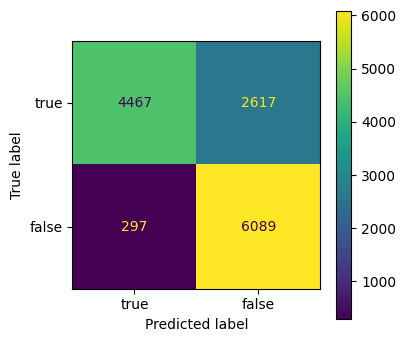

In [36]:
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=['true', 'false'])
fig, ax = plt.subplots(figsize=(4,4))
cm_display.plot(ax=ax)
plt.show()


## Data Visualization

In [50]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from prettytable import PrettyTable

# Simple tokenizer – converts to lowercase and splits by spaces
def text_tokenizer(text):
    return text.lower().split()

# Calculate word weights (TF-IDF or Count)
def calculate_word_weights(text_data, use_tfidf=True):
    if use_tfidf:
        vectorizer = TfidfVectorizer(tokenizer=text_tokenizer, stop_words='english')
    else:
        vectorizer = CountVectorizer(tokenizer=text_tokenizer, stop_words='english')

    X = vectorizer.fit_transform(text_data)
    means = X.mean(axis=0).tolist()[0]
    words = vectorizer.get_feature_names_out()

    # Add length filter and custom stopwords
    custom_stopwords = {'s', 't', '-', 'said', 'said.', '(', ')', 'reuters', 'u.s.'}
    word_weights = {
        words[i]: means[i]
        for i in range(len(words))
        if len(words[i]) > 2 and words[i] not in custom_stopwords
    }

    sorted_weights = dict(sorted(word_weights.items(), key=lambda x: x[1], reverse=True))
    return sorted_weights

# Visualize results – bar chart and table
def visualize_bow_terms(bow, title, top_n=15, pdf_name="fig.pdf"):
    top_items = list(bow.items())[:top_n]
    terms = [item[0] for item in top_items]
    weights = [item[1] for item in top_items]

    # Chart
    plt.barh(terms, weights)
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    plt.savefig(pdf_name)
    plt.clf()

    # Table
    table = PrettyTable()
    table.title = title
    table.add_column("Term", terms)
    table.add_column("Weight", weights)
    print(table)



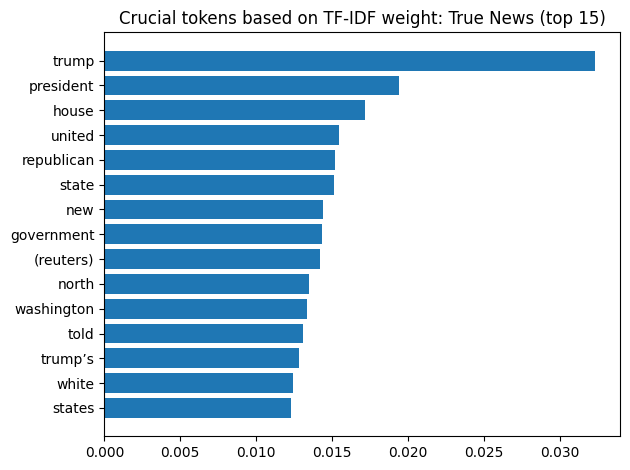

+-----------------------------------------------------------+
| Crucial tokens based on TF-IDF weight: True News (top 15) |
+--------------------+--------------------------------------+
|        Term        |                Weight                |
+--------------------+--------------------------------------+
|       trump        |         0.03232709446372658          |
|     president      |         0.019407262607239652         |
|       house        |         0.017163169319642246         |
|       united       |         0.015469874744532475         |
|     republican     |         0.01518226216335184          |
|       state        |         0.015097268470438553         |
|        new         |         0.014408381570609736         |
|     government     |         0.014318313759184126         |
|     (reuters)      |         0.014182763167138446         |
|       north        |         0.013475288114182755         |
|     washington     |         0.01336247031165545          |
|       

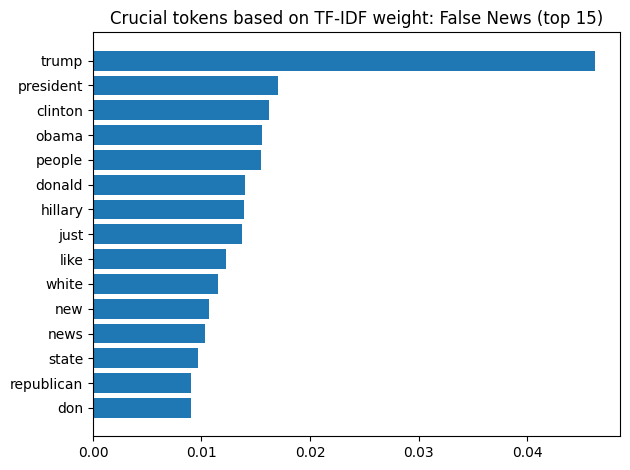

+------------------------------------------------------------+
| Crucial tokens based on TF-IDF weight: False News (top 15) |
+--------------------+---------------------------------------+
|        Term        |                 Weight                |
+--------------------+---------------------------------------+
|       trump        |          0.046251069045908144         |
|     president      |          0.017051594602305112         |
|      clinton       |          0.016231061636794792         |
|       obama        |          0.015573113039780463         |
|       people       |          0.015524307182252806         |
|       donald       |          0.013999051662081432         |
|      hillary       |          0.013932235211991321         |
|        just        |          0.01369030460073189          |
|        like        |          0.012270161624106045         |
|       white        |          0.011479967949779946         |
|        new         |          0.010714990394212186   

<Figure size 640x480 with 0 Axes>

In [51]:
top_n = 15  #How many top words to display?

# TRUE NEWS
visualize_bow_terms(
    calculate_word_weights(df[df['decision'] == 1]['text'], use_tfidf=True),
    'Crucial tokens based on TF-IDF weight: True News (top ' + str(top_n) + ')',
    top_n=top_n,
    pdf_name="fig_TF-IDF_tn.pdf"
)

# FALSE NEWS
visualize_bow_terms(
    calculate_word_weights(df[df['decision'] == 0]['text'], use_tfidf=True),
    'Crucial tokens based on TF-IDF weight: False News (top ' + str(top_n) + ')',
    top_n=top_n,
    pdf_name="fig_TF-IDF_fn.pdf"
)

